In [210]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numpy import array
from numpy import newaxis
import math
from scipy import stats
from subprocess import check_output
import seaborn as sns
# from keras.layers.core import Dense, Activation, Dropout
# from keras.layers.recurrent import LSTM
# from keras.models import Sequential
from sklearn.model_selection import  train_test_split
import time #helper libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import load_model


In [202]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [102]:
#load your data to train or predict on 
raw_data = pd.read_csv("features15.csv", low_memory=False)


In [289]:

df= df.fillna(0)
cols = [c for c in raw_data.columns if c.lower()[-1] == "s"]
df = raw_data[cols]

In [290]:
data_frame = df.sort_index(axis=1 ,ascending=True)
data_frame = data_frame.iloc[::-1]
data_frame = data_frame.sort_index(ascending=True, axis=1)
data_frame = data_frame.reindex(index=data_frame.index[::-1])


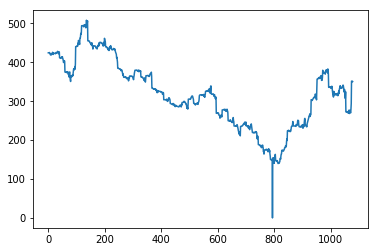

In [291]:
plt.plot(data_frame["CME_SES"])


In [250]:
h = "CME_0DS"
h[-1]
cols = [c for c in data_frame.columns if c.lower()[-1] == "s"]


In [287]:
cols = [c for c in data_frame.columns if c.lower()[-1] == "s"]
a_df = data_frame[cols]


In [292]:
df_z = np.abs(stats.zscore(a_df))
print(df_z)

[[1.37282038 1.28574923 1.15994979 ... 0.66327412 2.17257892 0.49637237]
 [1.37282038 1.28574923 1.15994979 ... 0.65645275 2.15715563 0.46417361]
 [1.37327676 1.28371557 1.1584353  ... 0.6581581  2.06461588 0.44986305]
 ...
 [0.20574151 0.43048749 0.42225186 ... 0.34096429 0.55453547 0.72479533]
 [0.22653095 0.25433015 0.34675516 ... 0.42282076 0.55453547 0.71286986]
 [0.20287111 0.33647249 0.33642096 ... 0.45010625 0.55453547 0.70332949]]


In [293]:
threshhold = 3
print(np.where(df_z>threshhold))
df_o = a_df[(df_z < threshhold).all(axis=1)]
print(f"Raw Data: {a_df.shape}")
print(f"Data with Z-Scores > {threshhold} removed: {df_o.shape}")

(array([  11,   11,   11,   29,   30,   31,   32,   32,   34,   35,   36,
         37,   38,   39,   40,   41,   42,   43,   45,   46,   46,   47,
         48,   49,   50,   51,   51,   52,   53,   54,   61,   62,   64,
         65,   66,   68,   69,   70,   71,   72,   73,   92,   96,   97,
         98,   99,  100,  100,  101,  102,  103,  104,  105,  106,  107,
        108,  109,  109,  109,  110,  110,  111,  111,  112,  112,  113,
        114,  114,  115,  116,  117,  118,  119,  120,  120,  121,  122,
        123,  124,  125,  126,  127,  128,  129,  129,  130,  131,  132,
        132,  133,  134,  135,  135,  136,  136,  136,  137,  137,  137,
        138,  138,  138,  139,  139,  139,  140,  140,  140,  141,  141,
        141,  142,  142,  142,  143,  143,  143,  144,  144,  144,  145,
        145,  146,  146,  147,  147,  148,  148,  148,  149,  149,  150,
        150,  151,  151,  151,  152,  153,  154,  155,  156,  157,  158,
        161,  181,  203,  203,  240,  241,  243,  

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


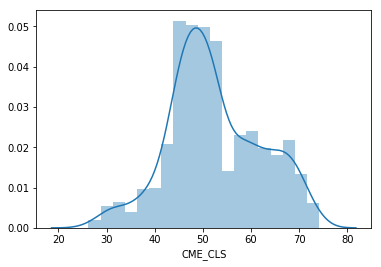

In [244]:
sns.distplot(df_o["CME_CLS"])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


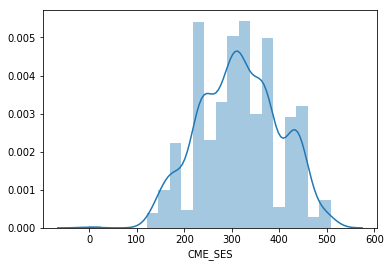

In [245]:
sns.distplot(df_o["CME_SES"])

In [294]:
print("Skewness: %f" % df_o["CME_SES"].skew())
print("Kurtosis: %f" % df_o['CME_SES'].kurt())
print("Skewness: %f" % df_o["CME_CLS"].skew())
print("Kurtosis: %f" % df_o['CME_CLS'].kurt())

Skewness: 0.005399
Kurtosis: -0.706020
Skewness: 0.223266
Kurtosis: -0.317619


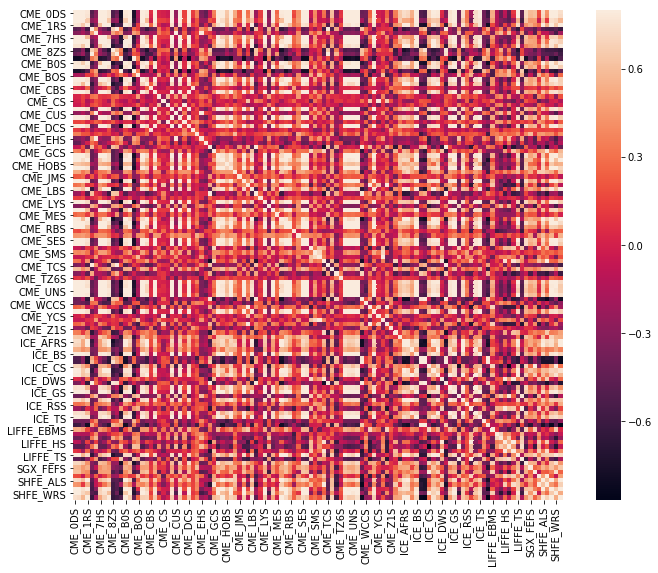

In [304]:
corrmat = df_o.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

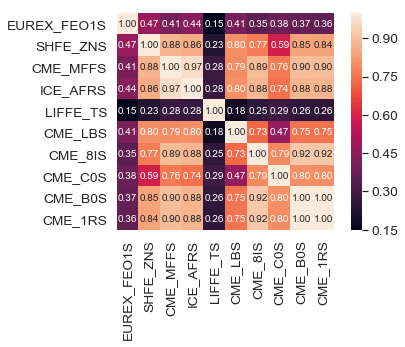

In [313]:
k = 10 #number of variables for heatmap
cols = corrmat.nsmallest(k, 'CME_TCS')['CME_TCS'].index
cm = np.corrcoef(a_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

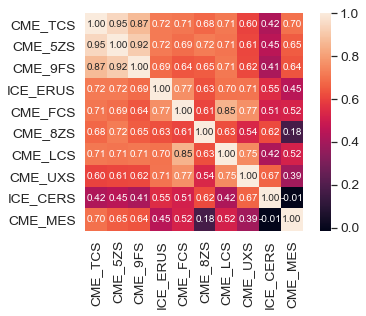

In [314]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'CME_TCS')['CME_TCS'].index
cm = np.corrcoef(a_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [295]:
dataset = df_o
dataset = dataset.values
dataset = dataset.astype('float32')
dataset

array([[  411.188,   434.217,    78.833, ..., 48880.   ,  4338.   ,
        21890.   ],
       [  411.188,   434.217,    78.833, ..., 48840.   ,  4327.   ,
        21755.   ],
       [  411.226,   434.043,    78.816, ..., 48850.   ,  4261.   ,
        21695.   ],
       ...,
       [  302.624,   343.252,    66.765, ..., 40880.   ,  2992.   ,
        15945.   ],
       [  287.729,   332.333,    65.708, ..., 46100.   ,  2850.   ,
        16830.   ],
       [  245.112,   271.262,    55.504, ..., 47100.   ,  3184.   ,
        16495.   ]], dtype=float32)

In [296]:
#scale the data, makes the model happy
np.random.seed(7)

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# dataset = scaler
dataset

array([[0.91191524, 0.8971219 , 0.84615713, ..., 0.69666517, 0.99999994,
        0.64682144],
       [0.91191524, 0.8971219 , 0.84615713, ..., 0.6948377 , 0.99568623,
        0.6377396 ],
       [0.91202945, 0.8965994 , 0.84579855, ..., 0.6952945 , 0.96980387,
        0.6337033 ],
       ...,
       [0.5856611 , 0.62398255, 0.5916224 , ..., 0.33120143, 0.47215682,
        0.2468887 ],
       [0.540899  , 0.5911962 , 0.5693285 , ..., 0.5696665 , 0.4164706 ,
        0.30642444],
       [0.4128273 , 0.40781894, 0.35410863, ..., 0.6153494 , 0.54745096,
        0.28388828]], dtype=float32)

In [297]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

540 266


In [298]:
look_back = 3 # sets how many steps out from the current step model is looking, 3 is two days in our timeseries. The current day and two days out.
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [302]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainX

array([[[0.91191524],
        [0.91191524],
        [0.91202945]],

       [[0.91191524],
        [0.91202945],
        [0.9119813 ]],

       [[0.91202945],
        [0.9119813 ],
        [0.91916376]],

       ...,

       [[0.3493129 ],
        [0.3496104 ],
        [0.34613037]],

       [[0.3496104 ],
        [0.34613037],
        [0.34145433]],

       [[0.34613037],
        [0.34145433],
        [0.34380138]]], dtype=float32)

In [199]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(5, input_shape=(look_back, 1)))
model.add(Dense(3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 1s - loss: 0.0442
Epoch 2/5
 - 1s - loss: 0.0018
Epoch 3/5
 - 1s - loss: 2.9688e-04
Epoch 4/5
 - 1s - loss: 2.5099e-04
Epoch 5/5
 - 1s - loss: 2.4782e-04


In [200]:
model.save('multilstm.h5') #change file name! lstm_modelCLstep15, lstm_modelCL

In [300]:
model = load_model('multilstm.h5') #load a model 

In [303]:
# make predictions
trainPredict = model.predict(trainX, verbose=2)
testPredict = model.predict(testX, verbose=2)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

ValueError: non-broadcastable output operand with shape (536,1) doesn't match the broadcast shape (536,116)

In [102]:
print((testPredict[2000:2010]),(dataset[8000:8010]))


[[0.3468077 ]
 [0.34272698]
 [0.34951416]
 [0.35562053]
 [0.36356774]
 [0.36121842]
 [0.35494915]
 [0.3511708 ]
 [0.3477213 ]
 [0.35334447]] [[0.2819753 ]
 [0.29702678]
 [0.3059984 ]
 [0.31467345]
 [0.29361615]
 [0.28486696]
 [0.30243942]
 [0.31408027]
 [0.3196412 ]
 [0.30933496]]


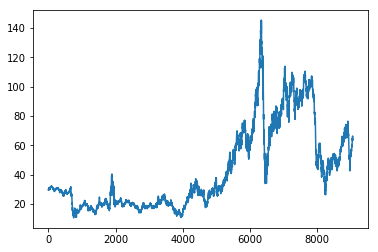

In [348]:
plt.plot(scaler.inverse_transform(dataset))


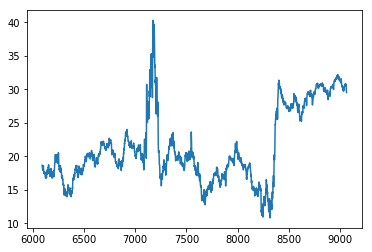

In [319]:
plt.plot(testPredictPlot)


In [438]:
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.01 RMSE
Test Score: 0.01 RMSE


Crude Oil Contract - Univariate

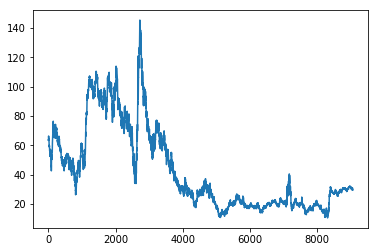